In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, r2_score

In [2]:
df = pd.read_csv('../data/cleaned_heart_disease.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,slope_downsloping,slope_flat,slope_upsloping,num
0,0.708333,1,1,0.481132,0.244292,1,2,0.603053,0,2.3,0.0,6.0,1.0,0.0,0.0,0
1,0.791667,1,4,0.622642,0.365297,0,2,0.282443,1,1.5,3.0,3.0,0.0,1.0,0.0,2
2,0.791667,1,4,0.245283,0.235160,0,2,0.442748,1,2.6,2.0,7.0,0.0,1.0,0.0,1
3,0.166667,1,3,0.339623,0.283105,0,0,0.885496,0,3.5,0.0,3.0,1.0,0.0,0.0,0
4,0.250000,0,2,0.339623,0.178082,0,2,0.770992,0,1.4,0.0,3.0,0.0,0.0,1.0,0


In [3]:
x = df.drop('num', axis=1)
y = df['num']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [4]:
models = {
  'Logistic Regression': LogisticRegression(max_iter=1000),
  'Decision Tree': DecisionTreeClassifier(),
  'Random Forest': RandomForestClassifier(),
  'Support Vector Machine': SVC(probability=True)
}

In [5]:
def training_models_ml(models):
  classes = np.unique(y_test)
  y_test_bin = label_binarize(y_test, classes=classes)
  with open('../results/evaluation_metrics.txt', "w") as f:
			for name, model in models.items():
				model.fit(x_train, y_train)

				y_pred = model.predict(x_test)
				y_proba = model.predict_proba(x_test)

				class_report = classification_report(y_test, y_pred)
				auc_score = roc_auc_score(y_test_bin, y_proba, multi_class='ovr')
				r2score = r2_score(y_test, y_pred)

				print(f'classification Report Of {name}: \n\n{class_report}\n')
				print(f'AUC Score of {name}: {auc_score}\n')
				print(f'R2 Score Of {name}: {r2score}')

				f.write(f'Classification Report Of {name}: \n\n{class_report}\n')
				f.write(f'AUC Score of {name}: {auc_score}\n')
				f.write(f'R2 Score Of {name}: {r2score}')
				f.write('=' * 100 + '\n\n')

				plt.figure(figsize=(7, 5))
				for i in range(len(classes)):
					fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
					plt.plot(fpr, tpr, label=f'Class {classes[i]}')

				plt.xlabel('False Positive')
				plt.ylabel('True Positive')
				plt.title(f'ROC Curve Of {name}')
				plt.legend()
				plt.show()
				print('\n\n=================================================================================================\n\n')

classification Report Of Logistic Regression: 

              precision    recall  f1-score   support

           0       0.66      0.83      0.74        30
           1       0.31      0.25      0.28        36
           2       0.30      0.28      0.29        25
           3       0.33      0.30      0.32        33
           4       0.60      0.67      0.63        36

    accuracy                           0.47       160
   macro avg       0.44      0.47      0.45       160
weighted avg       0.44      0.47      0.45       160


AUC Score of Logistic Regression: 0.7720350823778053

R2 Score Of Logistic Regression: 0.3443485779807891


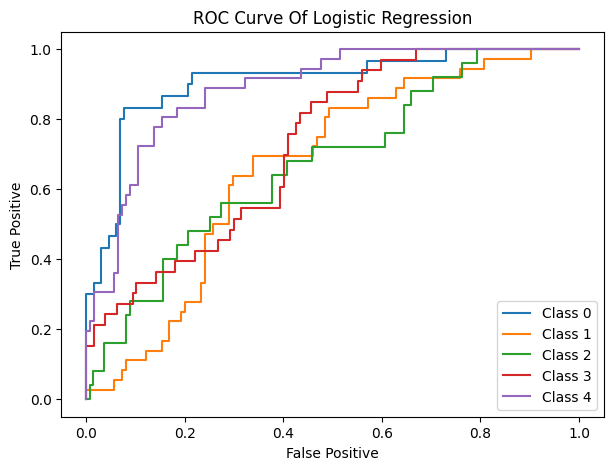





classification Report Of Decision Tree: 

              precision    recall  f1-score   support

           0       0.89      0.57      0.69        30
           1       0.65      0.78      0.71        36
           2       0.67      0.72      0.69        25
           3       0.84      0.82      0.83        33
           4       0.85      0.92      0.88        36

    accuracy                           0.77       160
   macro avg       0.78      0.76      0.76       160
weighted avg       0.78      0.77      0.77       160


AUC Score of Decision Tree: 0.8508516729791813

R2 Score Of Decision Tree: 0.693227316302938


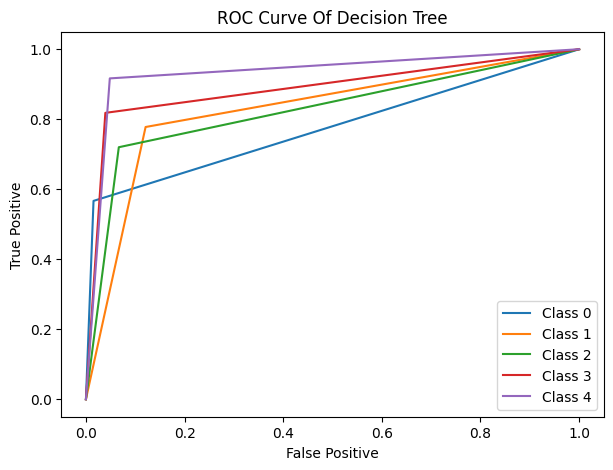





classification Report Of Random Forest: 

              precision    recall  f1-score   support

           0       0.96      0.73      0.83        30
           1       0.81      0.72      0.76        36
           2       0.80      0.96      0.87        25
           3       0.84      0.97      0.90        33
           4       0.95      0.97      0.96        36

    accuracy                           0.87       160
   macro avg       0.87      0.87      0.87       160
weighted avg       0.87      0.87      0.87       160


AUC Score of Random Forest: 0.9795320625479377

R2 Score Of Random Forest: 0.8345833568300156


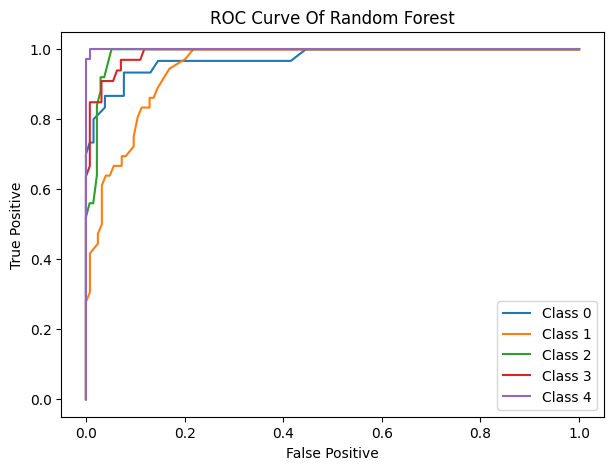





classification Report Of Support Vector Machine: 

              precision    recall  f1-score   support

           0       0.57      0.80      0.67        30
           1       0.38      0.17      0.23        36
           2       0.22      0.16      0.19        25
           3       0.43      0.55      0.48        33
           4       0.60      0.69      0.64        36

    accuracy                           0.48       160
   macro avg       0.44      0.47      0.44       160
weighted avg       0.45      0.48      0.45       160


AUC Score of Support Vector Machine: 0.7947394577717413

R2 Score Of Support Vector Machine: 0.38344705727551265


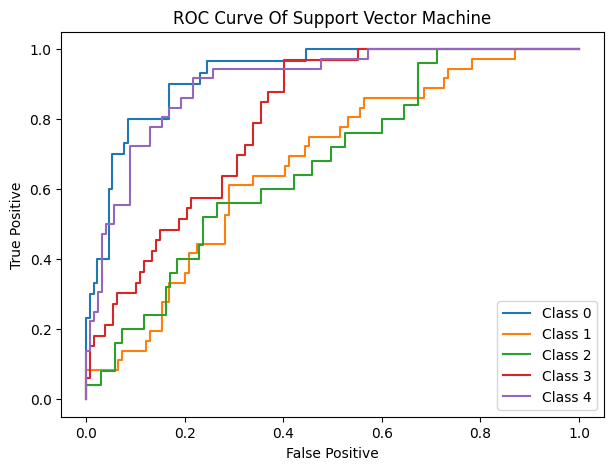

In [6]:
training_models_ml(models)